In [72]:
import pandas as pd
import numpy as np

Seoul_COVID = pd.read_csv('../data/서울시 코로나19 확진자 현황.csv' , encoding='euc-kr')
Seoul_COVID
Date_COVID =pd.read_csv('../data/코로나날짜.csv' , encoding='euc-kr')


In [47]:
Seoul_COVID.sort_values(by='소계' , ascending=False)

,구별,소계,감염,완치,사망
4,관악구,456,44,407,5
17,송파구,367,24,341,2
16,성북구,345,10,327,8
8,노원구,325,14,308,3
0,강남구,302,30,269,3
3,강서구,297,6,286,5
21,은평구,260,9,246,5
11,동작구,259,13,244,2
9,도봉구,223,17,202,4
14,서초구,214,10,204,0


In [49]:
Seoul_COVID['사망율'] = (Seoul_COVID['사망'] / Seoul_COVID['소계']*100)
Seoul_COVID

,구별,소계,감염,완치,사망,사망율
0,강남구,302,30,269,3,0.993377
1,강동구,200,8,191,1,0.500000
2,강북구,156,4,152,0,0.000000
3,강서구,297,6,286,5,1.683502
4,관악구,456,44,407,5,1.096491
5,광진구,136,3,129,4,2.941176
6,구로구,199,12,186,1,0.502513
7,금천구,96,2,92,2,2.083333
8,노원구,325,14,308,3,0.923077
9,도봉구,223,17,202,4,1.793722


In [52]:
pop_Seoul = pd.read_excel('../data/01.population_in_Seoul.xls' , header = 2 , usecols = 'B,D,G,J,N' , encoding='utf-8')            
pop_Seoul.rename( columns = { pop_Seoul.columns[0] : '구별', pop_Seoul.columns[1] : '인구수', pop_Seoul.columns[2] : '한국인', pop_Seoul.columns[3] : '와국인', pop_Seoul.columns[4] : '고령자' } , inplace = True )

# 첫 행 합계는 계산 행 이므로 삭제
# 삭제 함수 : del 명령어, drop() 함수
# 행 삭제 : drop 함수
# 열 삭제 : del 명령어

pop_Seoul.drop(0).head()
pop_Seoul.drop(0 , inplace = True)
pop_Seoul.drop( [26] , inplace = True ) # 한번 실행하면 다시 실행되지 않도록 하기
pop_Seoul

,구별,인구수,한국인,와국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0
6,동대문구,369496.0,354079.0,15417.0,54173.0
7,중랑구,414503.0,409882.0,4621.0,56774.0
8,성북구,461260.0,449773.0,11487.0,64692.0
9,강북구,330192.0,326686.0,3506.0,54813.0
10,도봉구,348646.0,346629.0,2017.0,51312.0


In [54]:
data_result = pd.merge( Seoul_COVID, pop_Seoul , on='구별' )
data_result


,구별,소계,감염,완치,사망,사망율,인구수,한국인,와국인,고령자
0,강남구,302,30,269,3,0.993377,570500.0,565550.0,4950.0,63167.0
1,강동구,200,8,191,1,0.500000,453233.0,449019.0,4214.0,54622.0
2,강북구,156,4,152,0,0.000000,330192.0,326686.0,3506.0,54813.0
3,강서구,297,6,286,5,1.683502,603772.0,597248.0,6524.0,72548.0
4,관악구,456,44,407,5,1.096491,525515.0,507203.0,18312.0,68082.0
5,광진구,136,3,129,4,2.941176,372164.0,357211.0,14953.0,42214.0
6,구로구,199,12,186,1,0.502513,447874.0,416487.0,31387.0,56833.0
7,금천구,96,2,92,2,2.083333,255082.0,236353.0,18729.0,32970.0
8,노원구,325,14,308,3,0.923077,569384.0,565565.0,3819.0,71941.0
9,도봉구,223,17,202,4,1.793722,348646.0,346629.0,2017.0,51312.0


In [59]:
data_result.set_index( '구별' , inplace = True )
data_result.head()



KeyError: "None of ['구별'] are in the columns"

In [61]:
data_result['확진자비율'] = (data_result['소계'] / data_result['인구수']) * 100

In [62]:
data_result

,소계,감염,완치,사망,사망율,인구수,한국인,와국인,고령자,확진자비율
구별,,,,,,,,,,
강남구,302,30,269,3,0.993377,570500.0,565550.0,4950.0,63167.0,0.052936
강동구,200,8,191,1,0.500000,453233.0,449019.0,4214.0,54622.0,0.044127
강북구,156,4,152,0,0.000000,330192.0,326686.0,3506.0,54813.0,0.047245
강서구,297,6,286,5,1.683502,603772.0,597248.0,6524.0,72548.0,0.049191
관악구,456,44,407,5,1.096491,525515.0,507203.0,18312.0,68082.0,0.086772
광진구,136,3,129,4,2.941176,372164.0,357211.0,14953.0,42214.0,0.036543
구로구,199,12,186,1,0.502513,447874.0,416487.0,31387.0,56833.0,0.044432
금천구,96,2,92,2,2.083333,255082.0,236353.0,18729.0,32970.0,0.037635
노원구,325,14,308,3,0.923077,569384.0,565565.0,3819.0,71941.0,0.057079


In [56]:
# 파이썬의 그래프 그리는 모듈(패키지) : matplotlib.pyplot
# 서브 패키지 pyplot 이용

import matplotlib.pyplot as plt

# 그래프는 새창이 뜨면서 드로잉을 하는데 
# 새창 띄우지 말고 소스코드 안에서 드로잉 하라는 명령 입력 
%matplotlib inline

#한글문제 발생
#matplotlib의 기본폰트에서 한글지원 폰트가 없음
#패키지의 폰트를 추가하고 사용
#윈도우 용
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

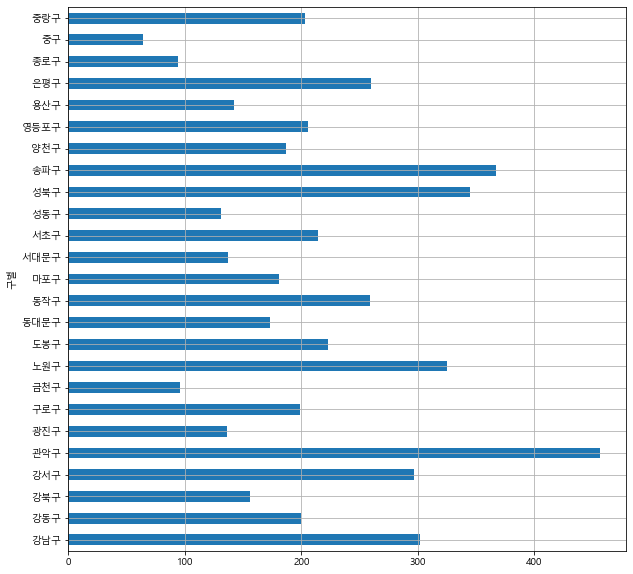

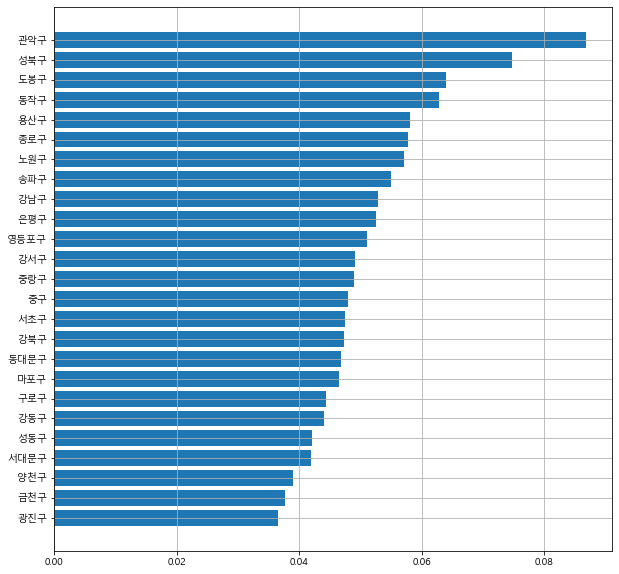

In [63]:
# 구별 CCTV 설치대수를 그래프로 표현
# 수평 막대 그래프 
# 전체 그림 크기( 그림 영역 설정 plt.figure(figsize=(10,10)) )

plt.figure( figsize=( 10 , 10 ) )
# 그래프 그리기 plot(kind=그래프종류값, grid = T/F (격자무늬) )

data_result['소계'].plot( kind='barh' , grid = True )

# 구별 CCTV 설치대수 그래프
# 수평막대 그래프 - 정렬해서 그래프 출력 
s = data_result['확진자비율'].sort_values()
plt.figure( figsize = (10 , 10) )
plt.barh( s.index, s )
plt.grid()
plt.show()

In [73]:
# 파이썬의 그래프 그리는 모듈(패키지) : matplotlib.pyplot
# 서브 패키지 pyplot 이용

import matplotlib.pyplot as plt

# 그래프는 새창이 뜨면서 드로잉을 하는데 
# 새창 띄우지 말고 소스코드 안에서 드로잉 하라는 명령 입력 
%matplotlib inline

#한글문제 발생
#matplotlib의 기본폰트에서 한글지원 폰트가 없음
#패키지의 폰트를 추가하고 사용
#윈도우 용
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # 윈도우
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

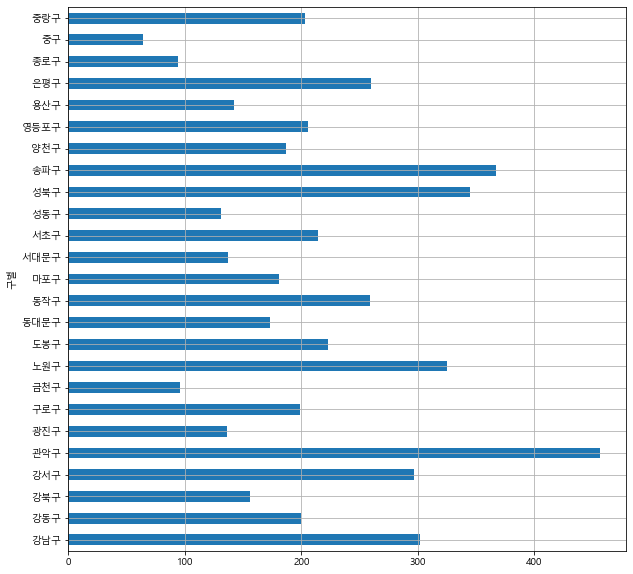

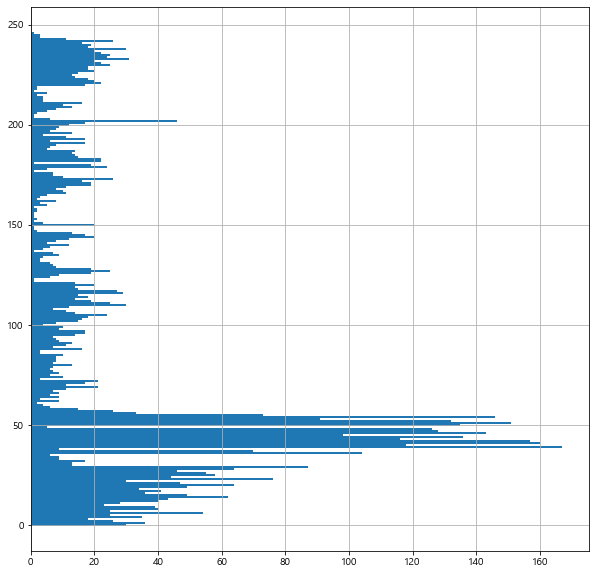

In [75]:
# 구별 CCTV 설치대수를 그래프로 표현
# 수평 막대 그래프 
# 전체 그림 크기( 그림 영역 설정 plt.figure(figsize=(10,10)) )

plt.figure( figsize=( 10 , 10 ) )
# 그래프 그리기 plot(kind=그래프종류값, grid = T/F (격자무늬) )

data_result['소계'].plot( kind='barh' , grid = True )

# 구별 CCTV 설치대수 그래프
# 수평막대 그래프 - 정렬해서 그래프 출력 


In [76]:
Date_COVID['소계'].sort_values()

123      1
217      1
205      1
204      1
181      1
      ... 
54     146
51     151
42     157
41     160
39     167
Name: 소계, Length: 247, dtype: int64

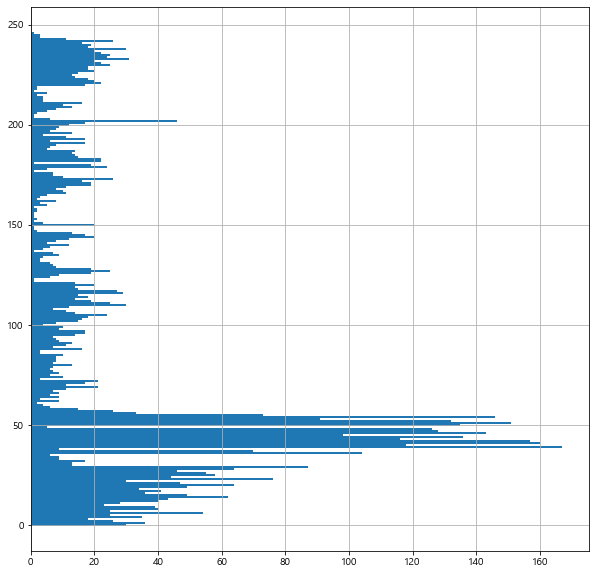

In [77]:

s = Date_COVID['소계'].sort_values()
plt.figure( figsize = (10 , 10) )
plt.barh( s.index, s )
plt.grid()
plt.show()

In [78]:
Date_COVID

,확진일,소계
0,9.30.,30
1,9.29.,36
2,9.28.,26
3,9.27.,18
4,9.26.,35
...,...,...
242,10.02.,26
243,10.01.,11
244,1.31.,3
245,1.30.,3


In [82]:
Date_COVID.set_index( '확진일' , inplace = True )



KeyError: "None of ['확진일'] are in the columns"

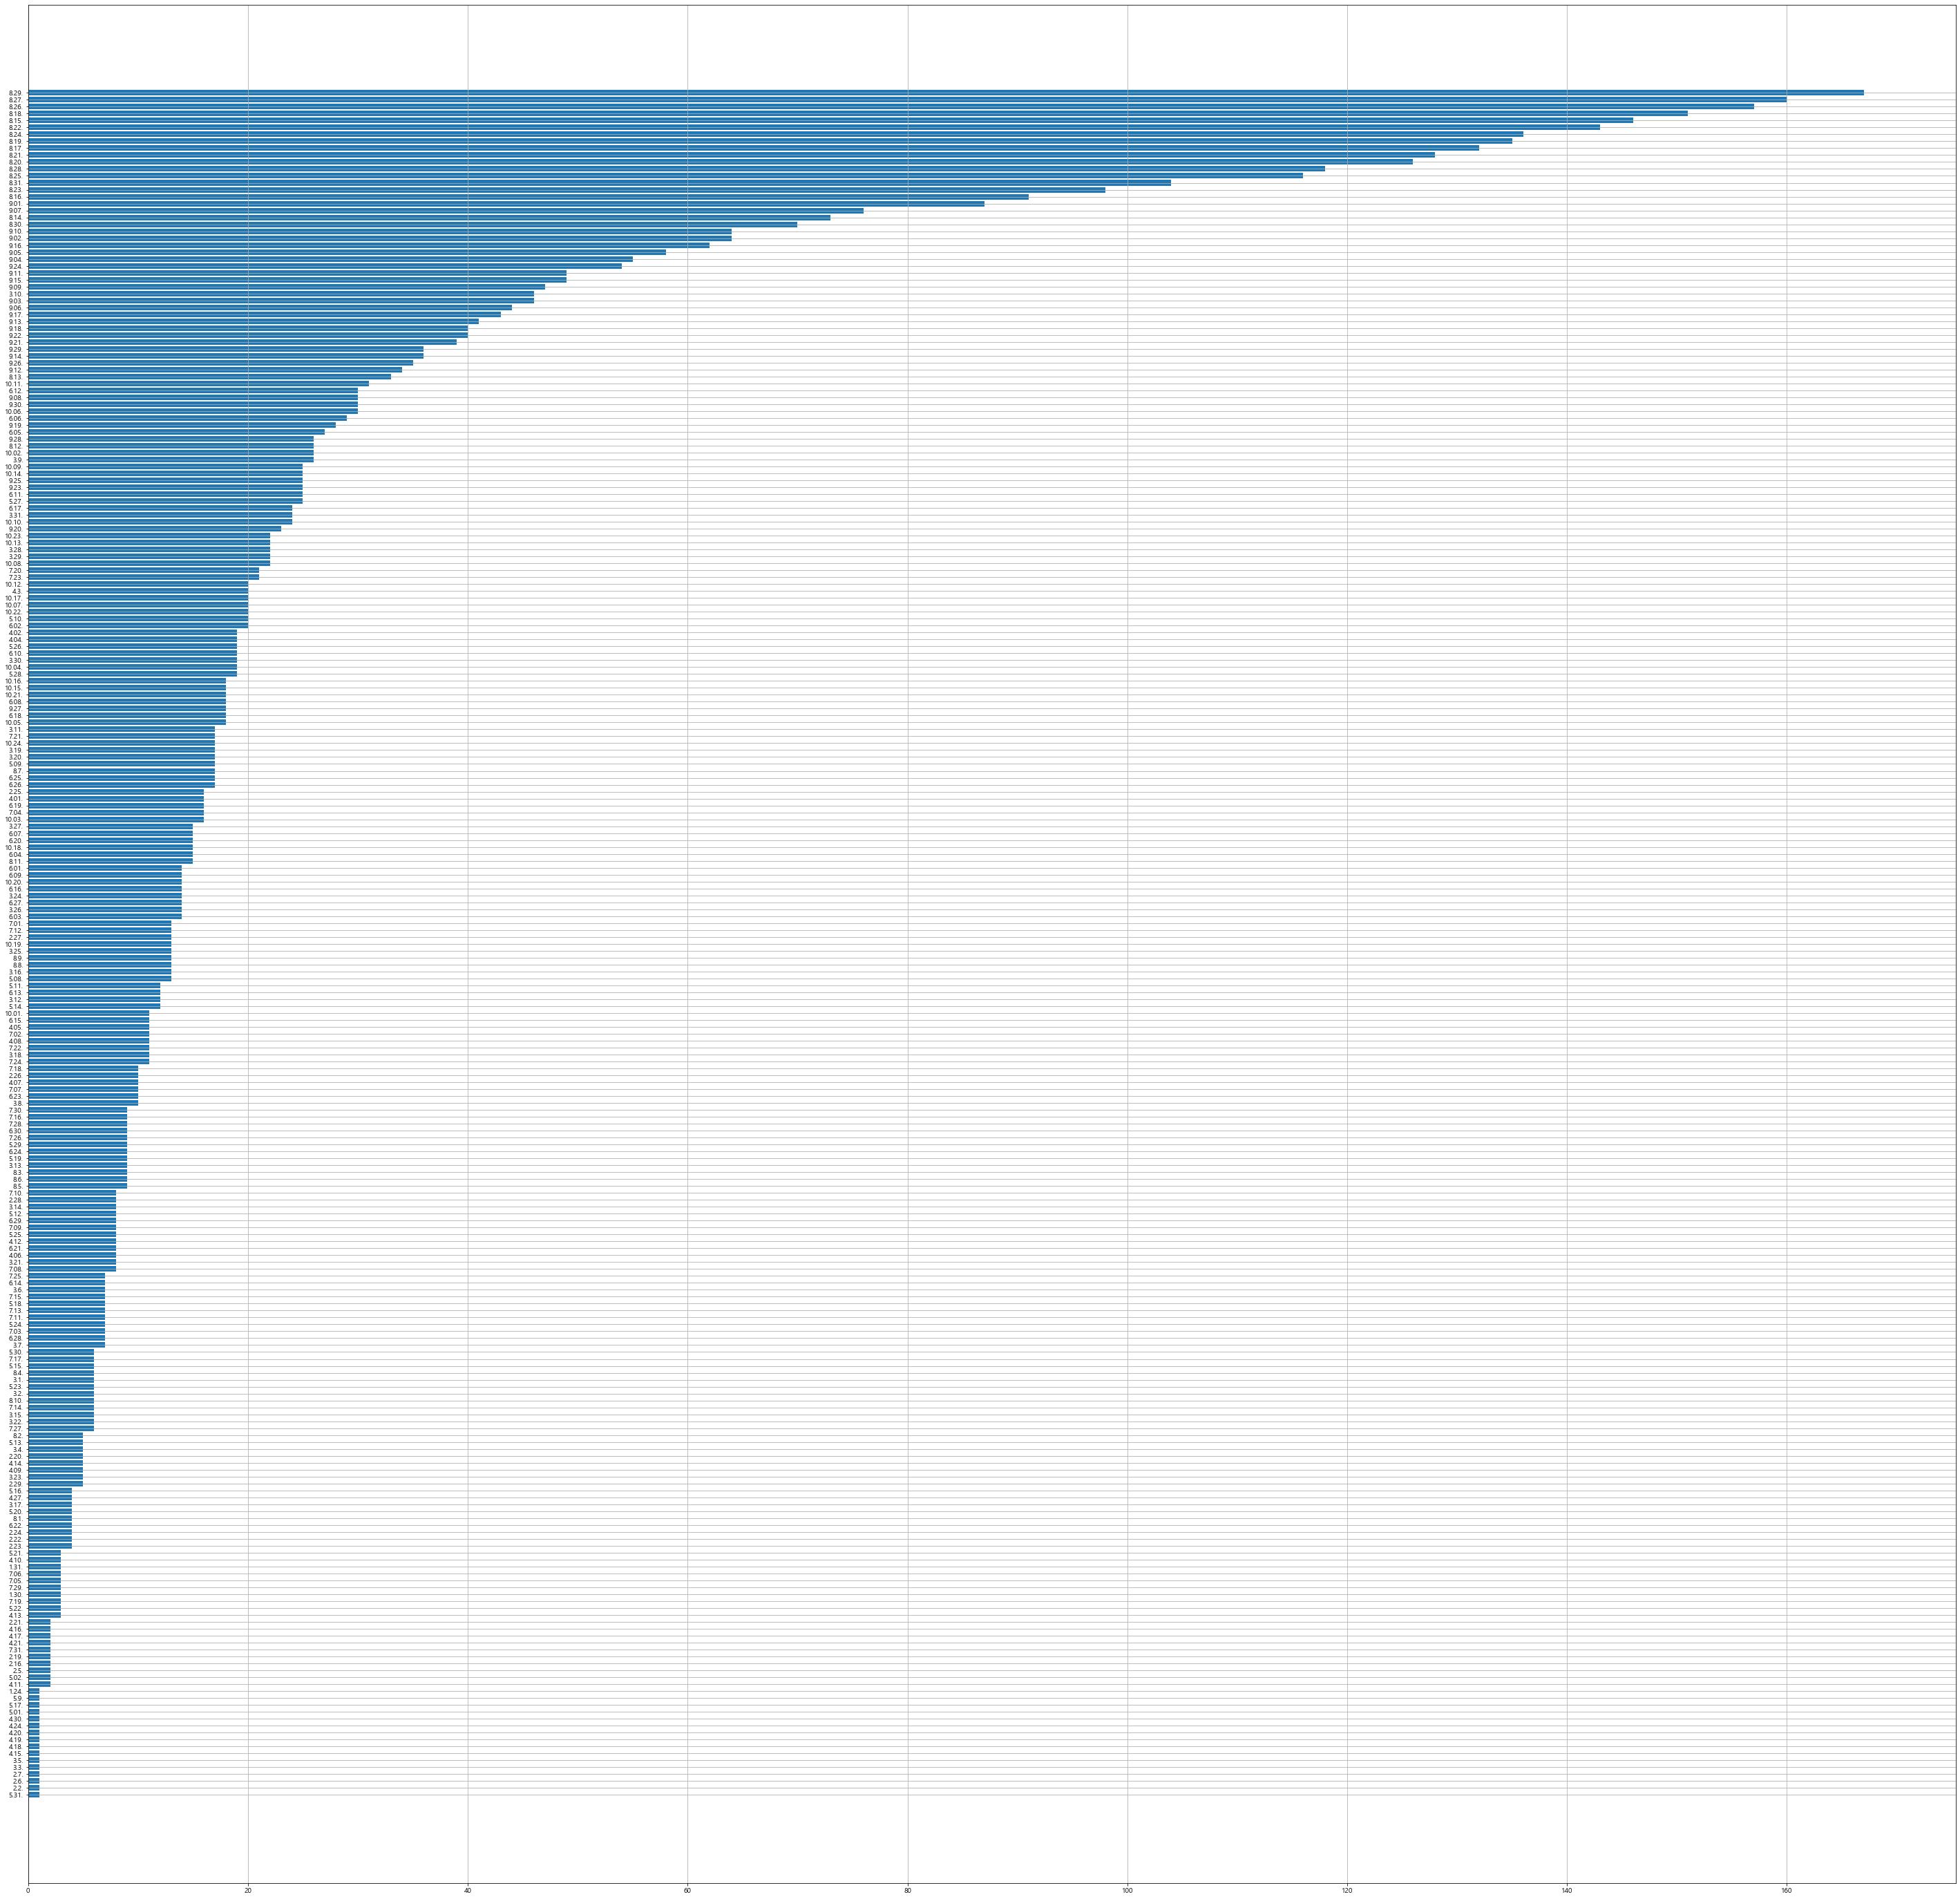

In [84]:

s = Date_COVID['소계'].sort_values()
plt.figure( figsize = (50 , 50) )
plt.barh( s.index, s )
plt.grid()
plt.show()

In [86]:
Date_COVID['소계'].sort_values().tail(30)

확진일
3.10.     46
9.09.     47
9.15.     49
9.11.     49
9.24.     54
9.04.     55
9.05.     58
9.16.     62
9.02.     64
9.10.     64
8.30.     70
8.14.     73
9.07.     76
9.01.     87
8.16.     91
8.23.     98
8.31.    104
8.25.    116
8.28.    118
8.20.    126
8.21.    128
8.17.    132
8.19.    135
8.24.    136
8.22.    143
8.15.    146
8.18.    151
8.26.    157
8.27.    160
8.29.    167
Name: 소계, dtype: int64